Complex Data Transformation and Analysis


Multiplots


    Task: Given a complex, multi-dimensional dataset, apply advanced transformation and analysis techniques to extract meaningful insights.
    Objective: This exercise aims to test your ability to think creatively and apply various SciPy and NumPy functions in a complex, real-world-like scenario.
    Dataset: A dataset representing a scientific experiment with multiple variables (e.g., temperature, pressure, and chemical concentration) measured over time. The dataset should have at least 1000 entries and multiple variables.


    Challenges:
1. Data Transformation:

Goal: Prepare the data for analysis by applying transformations.
Steps and Hints:
Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
Logarithmic Scaling (Optional): Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.
Fourier Transformation: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.
Tools: Explore np.fft.fft for Fourier transformation.
2. Statistical Analysis:

Goal: Extract statistical insights from the data.
Steps and Hints:
Descriptive Statistics: Use pandas describe() function to get an overview of the data.
Correlation Analysis: Calculate and interpret the correlation between variables using pandas corr() function.
Inferential Statistics: Consider conducting hypothesis tests or regression analysis to draw deeper insights.
Tools: Explore scipy.stats for advanced statistical functions.
3. Data Visualization:

Goal: Create visual representations of your findings.
Steps and Hints:
Heatmaps: Use heatmaps to visualize correlation matrices. This can be done with seaborn.
Multi-dimensional Scatter Plots: Create scatter plots for pairs of variables to explore their relationships. seaborn’s pairplot is useful here.
Fourier Transform Visualizations: Plot the amplitude vs. frequency graphs for the Fourier transformed data.
Tools: Utilize matplotlib and seaborn for creating plots.
4. Interpretation:

Goal: Write a brief report interpreting the results of your analyses.
Steps and Hints:
Discuss Findings: Interpret the results of your statistical analyses and visualizations. Consider real-world implications or applications of your findings.
Relate to Real-World: Think about how these insights can be applied in practical scenarios or how they align with theoretical knowledge.
Reflect on the Process: Comment on what the data transformations and analyses reveal about the nature of the dataset.


In [ ]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
df = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [ ]:
ааdf.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [ ]:
df_normalized = (df - df.mean()) / df.std()

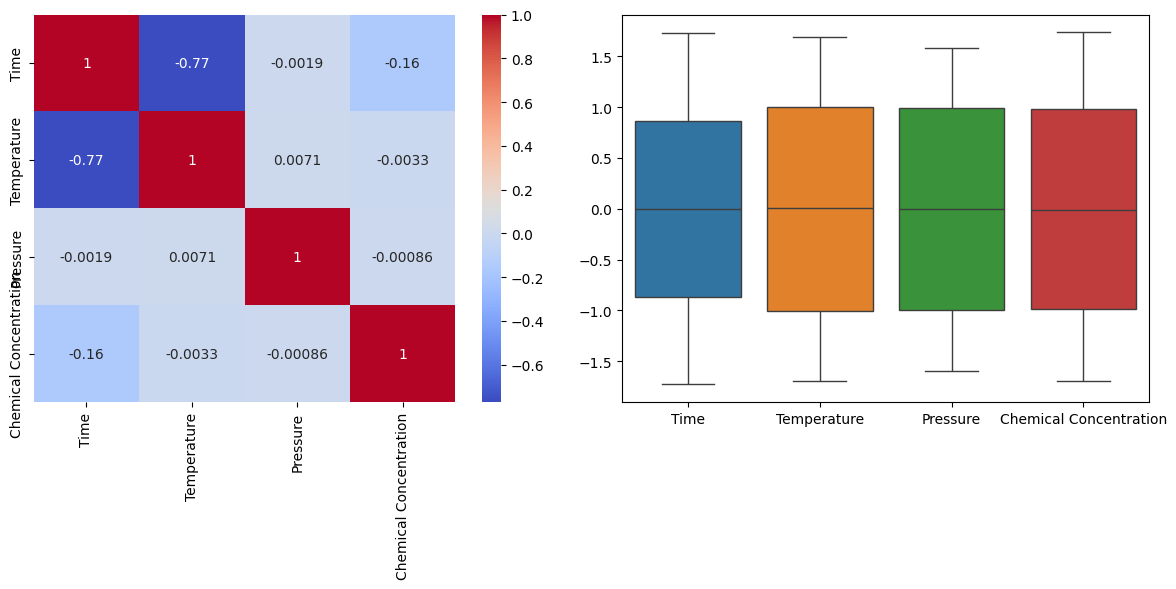

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(12, 6))
correlation_matrix = df_normalized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axis[0])
sns.boxplot(data=df_normalized, ax=axis[1])
plt.tight_layout()
# The only meaningful correlation is between Temperature and Time which is strognly negative
# Aside from Temp to Time I'd say there's no correlations, at least we have no evidence for one

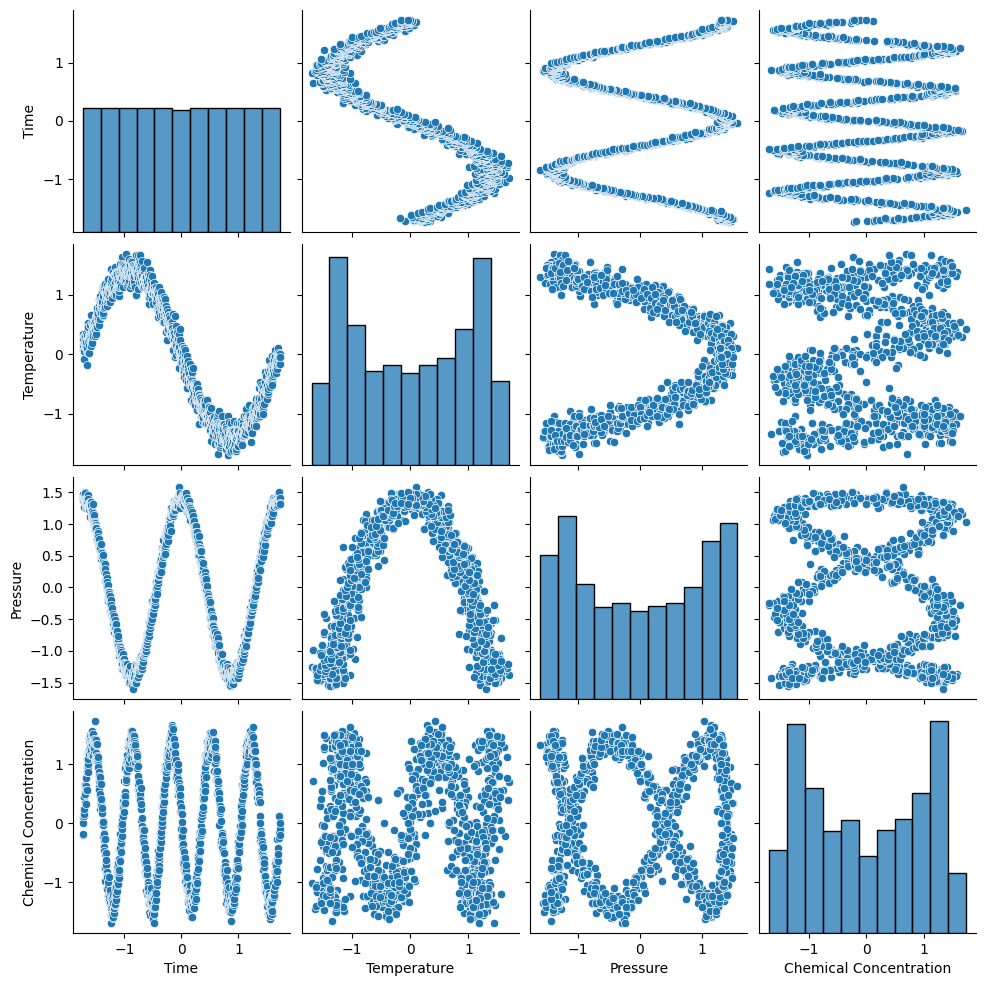

In [ ]:
sns.pairplot(df_normalized)
plt.show()

In [ ]:
log_scaled_ва = np.log1p(df)

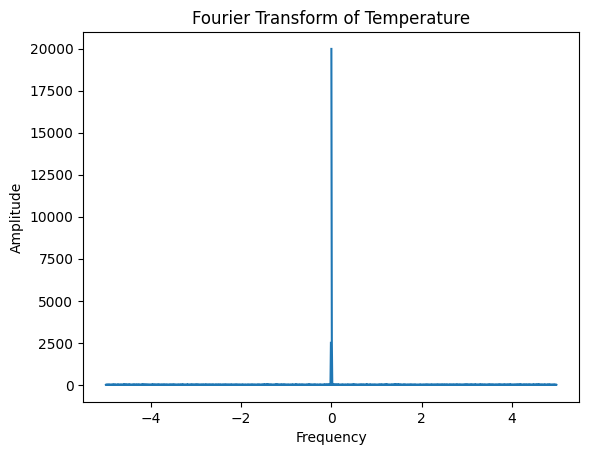

In [ ]:
temperature_fft = np.fft.fft(df["Temperature"])
frequencies = np.fft.fftfreq(len(temperature_fft), d=(df["Time"][1] - df["Time"][0]))
plt.plot(frequencies, np.abs(temperature_fft))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Fourier Transform of Temperature")
plt.show()

              Time  Temperature     Pressure  Chemical Concentration
count  1000.000000  1000.000000  1000.000000             1000.000000
mean     50.000000    19.977372  1013.033617                4.989754
std      28.910854     3.574943    14.203350                1.436505
min       0.000000    13.897407   990.284418                2.559310
25%      25.000000    16.386984   998.852247                3.576024
50%      50.000000    20.008666  1012.950967                4.970976
75%      75.000000    23.570373  1027.062114                6.398067
max     100.000000    26.030294  1035.471676                7.486763
Slope: -0.001316811762159647, Intercept: 5.016060725227689, R-squared: 1.0739188873204518e-05


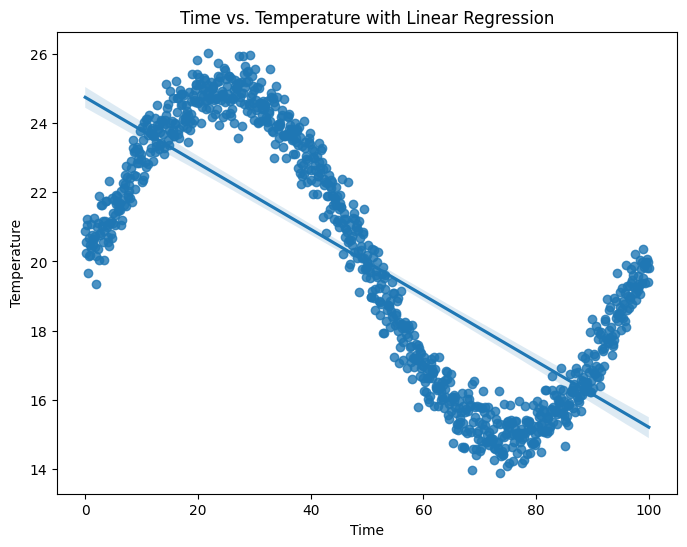

In [ ]:
print(df.describe())
correlation_matrix = df.corr()
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df["Temperature"], df["Chemical Concentration"])
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")

plt.figure(figsize=(8, 6))
sns.regplot(x="Time", y="Temperature", data=df)
plt.title("Time vs. Temperature with Linear Regression")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()